In [49]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [50]:
df_combined = pd.read_csv("../CombinedBooksRandomized.csv")
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,worth_reading
0,The Hiding Place: The Triumphant True Story of...,Corrie ten Boom,4.45,332535,13767,83,1971,4.44,298203,"Nonfiction,Biography,History,Christian,Classic...",yes
1,After Dead: What Came Next in the World of Soo...,Charlaine Harris,3.94,3519866,139555,197,2013,3.01,15654,"Fantasy,Fantasy,Paranormal,Fantasy,Fiction,Fan...",no
2,Far From the Madding Crowd (Paperback),Thomas Hardy,3.86,673575,32752,1187,1874,3.95,143170,"Classics,Fiction,Romance,Historical,Literature...",yes
3,In Five Years (Hardcover),Rebecca Serle,3.75,500043,49618,13,2020,3.81,343450,"Romance,Fiction,Contemporary,Audiobook,Womens ...",yes
4,The Secret Life of Bees (Paperback),Sue Monk Kidd,4.07,1745246,82644,38,2001,4.08,1228709,"Fiction,Historical,Young Adult,Classics,Histor...",yes


In [51]:
minRaters=min(df_combined.Raters)
maxRaters=max(df_combined.Raters)
meanRaters=df_combined.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8958054
Mean Raters : 317925.05147484096


In [69]:
df_combined['worth_reading']= np.where(df_combined.worth_reading == "yes" ,1,0)

In [70]:
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,worth_reading
0,The Hiding Place: The Triumphant True Story of...,Corrie ten Boom,4.45,332535,13767,83,1971,4.44,298203,"Nonfiction,Biography,History,Christian,Classic...",0
1,After Dead: What Came Next in the World of Soo...,Charlaine Harris,3.94,3519866,139555,197,2013,3.01,15654,"Fantasy,Fantasy,Paranormal,Fantasy,Fiction,Fan...",0
2,Far From the Madding Crowd (Paperback),Thomas Hardy,3.86,673575,32752,1187,1874,3.95,143170,"Classics,Fiction,Romance,Historical,Literature...",0
3,In Five Years (Hardcover),Rebecca Serle,3.75,500043,49618,13,2020,3.81,343450,"Romance,Fiction,Contemporary,Audiobook,Womens ...",0
4,The Secret Life of Bees (Paperback),Sue Monk Kidd,4.07,1745246,82644,38,2001,4.08,1228709,"Fiction,Historical,Young Adult,Classics,Histor...",0


In [54]:
#split dataset in features and target variable
feature_cols=["Author Average Rating", "Author Votes", "Review Count", "Distinct Works", "Year"]
X = df_combined[feature_cols] # Features
y = df_combined['worth_reading'] # Target variable

print(X)
print(y)

      Author Average Rating  Author Votes  Review Count  Distinct Works  Year
0                      4.45        332535         13767              83  1971
1                      3.94       3519866        139555             197  2013
2                      3.86        673575         32752            1187  1874
3                      3.75        500043         49618              13  2020
4                      4.07       1745246         82644              38  2001
...                     ...           ...           ...             ...   ...
1724                   4.20        817207         96336              35  2020
1725                   4.12        445393         46820              20  2020
1726                   3.86       1075244         91140              16  2007
1727                   4.07         81509         10169              13  2020
1728                   3.05         20869          1573             328  2001

[1729 rows x 5 columns]
0       1
1       1
2       1
3       1

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( random_state=42)




In [56]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'ccp_alpha': [0.1, .01, .001],
    'max_features': ['auto', 'sqrt', 'log2'],
    "max_depth": list(range(2, 100)),
    "n_estimators": [2, 5, 10, 15, 25],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, cv = 3, param_grid= parameter_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 5, 10, 15, 25]})

In [57]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003653,0.000923,0.001334,4.753787e-04,0.1,gini,2,auto,2,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",1.0,1.0,1.0,1.0,0.0,1
1,0.010997,0.001412,0.002000,3.893359e-07,0.1,gini,2,auto,5,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",1.0,1.0,1.0,1.0,0.0,1
2,0.014999,0.005888,0.002666,9.429655e-04,0.1,gini,2,auto,10,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",1.0,1.0,1.0,1.0,0.0,1
3,0.015332,0.001886,0.002001,1.685874e-06,0.1,gini,2,auto,15,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",1.0,1.0,1.0,1.0,0.0,1
4,0.021003,0.001414,0.002998,9.733398e-07,0.1,gini,2,auto,25,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,0.002997,0.000003,0.001004,2.540647e-06,0.001,entropy,99,log2,2,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",1.0,1.0,1.0,1.0,0.0,1
8816,0.005001,0.000001,0.000999,1.969260e-06,0.001,entropy,99,log2,5,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",1.0,1.0,1.0,1.0,0.0,1
8817,0.008649,0.000479,0.001333,4.768349e-04,0.001,entropy,99,log2,10,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",1.0,1.0,1.0,1.0,0.0,1
8818,0.011343,0.000481,0.001663,4.720505e-04,0.001,entropy,99,log2,15,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",1.0,1.0,1.0,1.0,0.0,1


In [67]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.1, max_depth=2, max_features='auto',
                       n_estimators=2, random_state=42)

From the best parameters found through the gridsearch, we create the model

In [68]:
forest_class = RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=12,
                       max_features='auto', n_estimators=2, random_state=42)
forest_class.fit(X_train, y_train)
predictions = forest_class.predict(X_test)
predictions

from sklearn.metrics import accuracy_score, confusion_matrix

print("Trained acc: ", accuracy_score(y_train, forest_class.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix train: ", "\n", confusion_matrix(y_train, forest_class.predict(X_train)))
print("Confusion matrix test: ", "\n",confusion_matrix(y_test, predictions))


Trained acc:  1.0
Test accuracy: 1.0
Confusion matrix train:  
 [[1158]]
Confusion matrix test:  
 [[571]]


From the best parameters found through the gridsearch, we create the model

In [60]:
# forest_class = RandomForestClassifier(ccp_alpha = 0.001, criterion= "entropy",max_depth=5, max_features = "auto",n_estimators=50, random_state=42)
# forest_class.fit(X_train, y_train)
# predictions = forest_class.predict(X_test)
# predictions

# from sklearn.metrics import accuracy_score, confusion_matrix

# print("Trained acc: ", accuracy_score(y_train, forest_class.predict(X_train)))
# print("Test accuracy:", accuracy_score(y_test, predictions))
# print("Confusion matrix train: ", "\n", confusion_matrix(y_train, forest_class.predict(X_train)))
# print("Confusion matrix test: ", "\n",confusion_matrix(y_test, predictions))

In [61]:
forest_class.feature_importances_

array([0., 0., 0., 0., 0.])

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_train, forest_class.predict(X_train)))
print("---------------------------------------------------------")
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1158

    accuracy                           1.00      1158
   macro avg       1.00      1.00      1.00      1158
weighted avg       1.00      1.00      1.00      1158

---------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       571

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



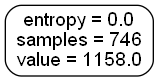

In [63]:
estimator = forest_class.estimators_[5]

dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('new_rf.png')
Image(graph.create_png())

In [64]:
import shap

explainer = shap.Explainer(forest_class.predict, X_test)

shap_values = explainer(X_test)


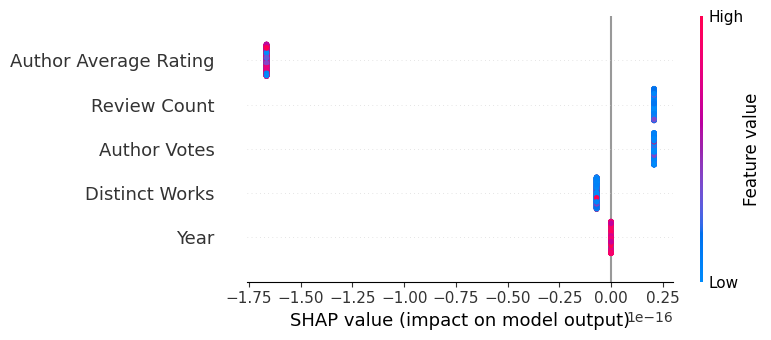

In [65]:
shap.summary_plot(shap_values, X_test)

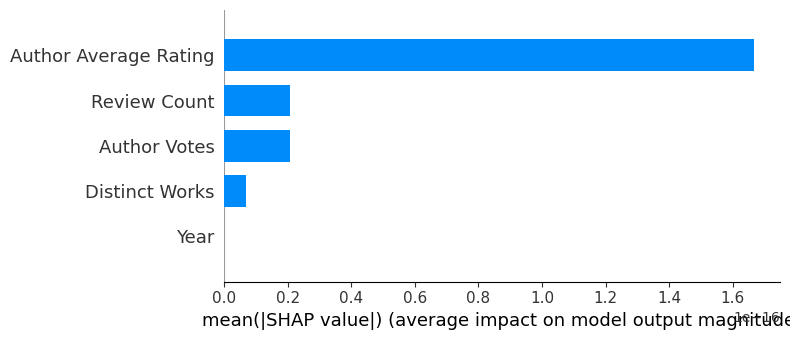

In [66]:
shap.summary_plot(shap_values, X_test, plot_type="bar")